# T cell Therapy of Chronic Myelogenous Leukemia

Audrey Fetsko, Jackson Howell and Kara Snyder  
Final Project for CBE 30338, Spring 2017

##### Model Adapted from:
Moore, Helen, and Natasha K. Li. “A Mathematical Model for Chronic Myelogenous Leukemia (CML) and T Cell Interaction.” Journal of Theoretical Biology, vol. 227, no. 4, 21 Apr. 2004, pp. 513–523. Science Direct, Accessed 11 Apr. 2017.    

## Problem Statement
The problem we are aiming to address is the effective administration of T cell therapy to treat and eliminate cancer cells from the blood stream. T cell therapy is a way of fighting cancer by helping the immune system recognize and attack cancer cells. This is done by collecting naive T cells from the patient and using genetic engineering to transform them into effector T cells. These engineered effector T cells are multiplied in the laboratory until millions have been attained. Then, the engineered cells are administered to the patient via infusion into the bloodstream, which greatly increases the number of CML effector T cells present in the patient, allowing them to fight off the cancer more effectively. This type of treatment is attractive because it uses the patient’s own cells and because the effector T cells are naturally more specifically targeted to cancer cells than most chemotherapeutics. Therefore, T cell therapy should have less hazardous side effects than standard treatments such as chemotherapy.

Specifically, T cell therapy can be used to treat leukemia. Our goal is to develop a model of leukemia during T cell therapy and use that to simulate treatment under different dosing regimens. We will then use these simulations to determine what a reasonable dosing regime would be. To accomplish this, we will need a model for how the concentration of cancer cells changes with the concentration of effector T cells. The model will need to account for interaction between cancer cells and effector T cells, the rate of promotion of naive T cells into effector T cells, and the natural growth and death rates of each type of cell. Additionally, the model will need to have a rate of infusion of new effector T cells.  If we can find or develop a model that meets these requirements, we should be able to simulate T cell therapy and determine a dosing strategy.

## Theory Behind Model
Helen Moore and Natasha Li developed a model of chronic myelogenous leukemia that meets most of the model requirements listed above. The model tracks the populations of three types of cells associated with chronic myelogenous leukemia (CML): the cancerous cells, naive or unactivated T cells, and effector T cells that are activated and specific to the cancer cells. The two populations of T cells are the portion of the immune system that is pertinent to our model. Naive T cells get activated in the lymph tissues by antigen presenting cells. These cells have on their surface major histocompatibility complexes (MHCs) that present parts of a specific antigen. A naive T cell that has receptors specific to CML peptides can bind to a CML peptide-MHC pair, which causes the naive T cell to proliferate into activated effector T cells. These effector T cells are then released into the bloodstream where they attack the CML cells. In order to keep our model reasonable, we decided not to include other aspects of the immune system and not to consider CD4+ T cells and CD8+ T cells separately. The assumption that these aspects will not significantly affect the system is consistent with the model developed by Li and Moore. 

The system for our model is the circulatory system. The model involves three differential equations, which track the accumulation of cancer cells, naive T cells, and effector T cells over time. The terms in these equations are delineated below and include terms for new T cells and cancer cells entering the blood from other compartments. However, the model assumes that the net diffusion of existing cells into and out of the cell is zero, which is a standard assumption and, according to Li and Moore, has experimental support. In order to model the activation of naive T cells by APCs, the number of APCs presenting CML antigens is modeled by as proportional to the number of CML cells, and the interaction is modelled as have Michaelis-Menten kinetics. It is important to note that the model is not expected to be accurate if the cell populations are on the order of one cell because at that scale, continuous rates are not good approximations. Furthermore, the model is intended for the chronic phase of CML, as that is the stage on which treatments are focused. During the accelerated and blast phases of the model, the assumptions made and parameter values used are not accurate representations of the system.

The one requirement for our model that is not met by Li and Moore’s model is the rate of infusion of new effector T cells for the T cell therapy. Therefore, we adapted Li and Moore’s model to include this by adding a term to the equation for the effective T cell population for the infusion of new effector T cells. We are assuming that the initial removal of naive T cells was done prior to time zero of the model. This way, the therapy does not require the addition of a term to the naive T cell equation. Furthermore, no terms need to be added the cancer cell model since the therapy works only by increasing the effectiveness of the already modeled mechanism through the increase in the number of effector T cells.

### Key Assumptions
* No diffusion of T cells or leukemia cells out of the blood stream
* CD4+ T cells and CD8+ T cells are not considered separately
* The naive and effector T cells are the only components of the immune system considered
* The CML is in the chronic stage
* Cell populations are not on the order of a single cell
* Removal of naive T cells for use in therapy occured prior to time zero
* T cell therapy is the only therapy being used in the patient

### Model Explanation

#### Equation 1:

\begin{equation}
\frac{dT_n}{dt} = s_n - d_n T_n - k_n T_n (\frac{C}{C+\eta})
\end{equation}

Equation (1) describes the change in population of naive T-cells circulating in the blood.  The terms on the right side of correspond to contributions and reductions to this population. First, naive T-cells are created in the bone marrow and the ($s_{n}$) term denotes this rate of cell production.  Next, while circulating in the blood, the naive T-cells will naturally die due to age and this natural reduction of the population is represented by the ($d_{n} T_{n}$) term.  Finally, the naive T-cells can be activated into effector T-cells through encounters with the CML antigen in the lymph.  This process is governed by Michaelis-Menten because the rate of encounters can become saturated, limited by the concentration of CML peptides.  This activation process is represented by ($k_n T_n \frac{C}{C+a}$).  However, it must be noted that costimulators must also be involved in this encounter in order for naive T-cells to be activated to effector T-cells.  Anergy, a state of abnormal immune function, can also occur.  In this case, T-cells are taken out of the naive population but not added to the effector population.  This will effect will be dealt with in equation (2).

#### Equation 2:

\begin{equation}
\frac{dT_e}{dt} = \alpha_n k_n T_n (\frac{C}{C+\eta})+\alpha_e T_e (\frac{C}{C+\eta}) - d_e T_e - \gamma_e C T_e + u(t)
\end{equation}

Equation (2) is representative of the effector T-cell population, the T-cells that actively combat the CML cancer cells.  This population is increased by three terms and reduced by two terms.  First, the population is contributed to by the successful recruitment of naive T-cells ($\alpha_{n}k_{n}T_{n}\frac{C}{C+\eta}$).  $(\alpha_{n})$ is a constant that represents the portion of promotions from the naive population that were successful, that did not contribute to anergy.   Second, it is possible for effector T-cells to recruit other effector T-cells to combat CML.  This recruitment occurs in a similar manner to naive T-cell activation and so is represented by ($\alpha_{e}T_{e}\frac{C}{C+\eta}$) in equation (2).  Next, the population is depleted by natural cell death  ($d_{e} T_{e}$) which is proportional to the population size.  Additionally, the encounters between effector T-cells and CML cancer cells are modeled by the law of mass action, essentially proposing that random encounters between effector T-cells and CML cells occur and that these encounters lead to either the loss of the effector T-cell, the loss of thecancer cell, or no change in either population.  The change in the effector T-cell population due to these interactions is represented by the last term ($\gamma_{e} C T_{e}$). Finallt, the u(t) term is the term we added to Moore and Li's model to incorporate the addition of effector T cells due to T cell therapy. The term is written as a funciton so that it can easily adapted for any dosing schedule.

#### Equation 3:

\begin{equation}
\frac{dC}{dt} = r_c C ln(\frac{C_{max}}{C})-d_c C - \gamma_c C T_e
\end{equation}

Equation (3) represents the population of CML cancer cells. Reductions to this population mirrors the reductions to the effector-T cell population, with a natural death term and losses due to law of mass action encounters.  The positive term in equation (3) is the growth term for the cancer cells.  This growth pattern is related to the Gompertz curve, a model specifically used to approximate cancer growth, and is represented by ($ r_{c}C ln(\frac{C_{max}}{C})$).

### Parameters
##### This table comes directly from the paper and these are the values we used for all of the parameters in our model.
|  Parameter |Description   |Value   |Range   |Units   |
|---|---|---|---|---|
|$s_n$|$T_n$ source term|0.073|(0, 0.5)|$\frac{cells}{\mu l}$|
|$d_n$|$T_n$ death rate|0.040|(0, 0.5)|$day^{-l}$|
|$d_e$|$T_e$ detah rate|0.06|(0, 0.5)|$day^{-l}$|
|$d_c$|$C$ detah rate|0.2|(0, 0.8)|$day^{-l}$|
|$k_n$|$T_n$ differentiation|0.001|(0, 0.1)|$day^{-l}$|
|$\eta$|Michaelis-Menten|100|(0, 1000)|$\frac{cells}{\mu l}$|
|$\alpha_n$|$T_e$ proliferation|0.41|(0, 1)|$dimensionless$|
|$\alpha_e$|$T_e$ recruitment|0.2|(0, 1)|$day^{-1}$|
|$C_{max}$|maximum $C$|3x10$^5$|(1.5x10$^5$, 4x10$^5$)|$\frac{cells}{\mu l}$|
|$r_c$|$C$ growth|0.03|(0, 0.5)|$day^{-l}$|
|$\gamma_e$|$T_e$ loss (due to $C$)|0.005|(0, 0.1)|$day^{-l} \frac{cells}{\mu l}^{-l}$|
|$\gamma_c$|$C$ loss (due to $T_e$)|0.005|(0, 0.1)|$day^{-l} \frac{cells}{\mu l}^{-l}$|


### Simplification and Scaling
##### This was also done in the paper, but we also adjusted out u(t) term to make it dimensionless as well.
* Nondimensionalization of the differential equations
$$\frac{dT_n}{dt} = 1 - T_n - \zeta_1 T_n (\frac{C}{C+\zeta_2})$$
$$\frac{dT_e}{dt} = \zeta_3 T_n (\frac{C}{C+\zeta_2}) + \zeta_4 T_e (\frac{C}{C+\zeta_2}) - d_{e} T_{e} - \zeta_5 C T_{e} + u^*(t)$$
$$\frac{dC}{dt} = \zeta_6 C \ln{(\frac{\zeta_7}{C})} - \zeta_8 C - C T_e$$
* new coefficents
$$\zeta_1 = \frac{k_n}{d_n}$$
$$\zeta_2 = \frac{\gamma_e \eta}{d_n}$$
$$\zeta_3 = \frac{\alpha_n k_n s_n \gamma_c}{d_n^3}$$
$$\zeta_4 = \frac{\alpha_e}{d_n}$$
$$\zeta_5 = \frac{d_e}{d_n}$$
$$\zeta_6 = \frac{r_c}{d_n}$$
$$\zeta_7 = \frac{\gamma_e C_{max}}{d_n}$$
$$\zeta_8 = \frac{d_c}{d_n}$$
$$ u^*(t) = \frac{\gamma_e}{d_n^2}u(t)$$

### Equilibrium Solution
Next, we used the differential equations to find the equilibrium solutions of the model. These are the solutions at which the cell populations are constant, meaning that $\frac{dT_n}{dt}$, $\frac{dT_e}{dt}$, and $\frac{dC}{dt}$ are all zero. At this point, we assumed that u(t) is a constant, meaning that the T cell therapy will involve a constant infusion of engineering effector cells. The expression for the equilibrium condition is the following:

$$c[-\frac{(c+\zeta_2)(c u^*(t) \zeta_1+u^*(t) \zeta_2+c(u^*(t)+\zeta_3))}{(c+c\zeta_1+\zeta_2)(\zeta_2(c+\zeta_5)+c(c-\zeta_4+\zeta_5)}+log(\frac{\zeta_7}{c}) \zeta_6-\zeta_8] = 0$$

As will be explored in the following plot, with no treatment (i.e. u(t) = 0), the model has two equilibrium solutions: an unstable "healthy" steady state with no cancer cells and a stable "cancerous" steady state.  Using the following plots, we found the concentrations of cells at this stable equilibrium based on the parameter values provided in the paper by Li and Moore.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
# Constant parameter values as used in Figure 8 of the paper
sn=0.073      # cells/microliter
dn=0.040      # 1/day
de=0.06       # 1/day
dc=0.2        # 1/day
kn=0.001      # 1/day
eta=100       # cells/microliter
alpha_n=0.41  # unitless
alpha_e=0.2   # 1/day
rc=0.03       # 1/day
gamma_e=0.005 # microliter/day*cell
gamma_c=0.005 # microliter/day*cell
Cmax=300000   # cells/microliter

# non-dimensionalized coefficents
zeta1=kn/dn
zeta2=(gamma_e*eta)/dn
zeta3=(alpha_n*kn*sn*gamma_c)/(dn**3.0)
zeta4=alpha_e/dn
zeta5=de/dn
zeta6=rc/dn
zeta7=(gamma_e*Cmax)/dn
zeta8=dc/dn

Below is a plot of the change of the cancer cell population with respect to time in a model with no infusion of effector T-cells(u(t)=0).  The two steady states occur when the derivative is equal to 0.

In [4]:
# Analysis in the absence of T cell therapy, u=0
c = np.linspace(0.0000001,60,1000000)

dCdt=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+((zeta3*c*(c+zeta2))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))

Cancer Steady State (cells/microliter)
376.0


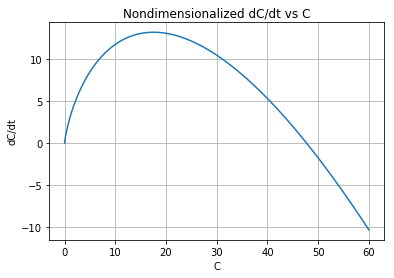

In [5]:
plt.plot(c,dCdt)
plt.xlabel('C')
plt.ylabel('dC/dt')
plt.title('Nondimensionalized dC/dt vs C')
plt.grid()
CancerSteadyState = 47/(gamma_e/dn)
print('Cancer Steady State (cells/microliter)')
print(CancerSteadyState)

By examining the above graph, it becomes clear that the healthy steady state, C=0, is unstable because the derivative to the right of it is positive. The unhealthy steady state at ~47 is stable (derivative is positive to the left and negative to the right). Therefore, without treatment, the cancer cell population moves towards this concentration in the blood (~376 cells/microliter).

The next step will be to analyze the behavior of the system when there is an infusion of effector T-cells.  Having performed the equilibrium state analysis, the criteria for determining an effective therapy would be the destabilization of the stable cancerous steady state.  If this can be accomplished, and the healthy stedy state can be made stable, then the cancer population will fall to zero after some amount of time.  The use of a constant value of u(t) in accomplishing this goal will be evaluated below.

In [6]:
# Analysis with a constant, non-zero value of u(t).
c = np.linspace(0.0000001,40,100000)
# The unscaled values of u are the actual infusion rates before they are nondimensionalized to be fed into the equation
u1_unscaled=4.4    # cells/microliter*day
u2_unscaled=4.6    # cells/microliter*day
u3_unscaled=4.8    # cells/microliter*day
# These are the nondimensionalized u values
u1 = u1_unscaled*gamma_c/dn**2
u2 = u2_unscaled*gamma_c/dn**2;
u3 = u3_unscaled*gamma_c/dn**2;
# Each nondimensionalized u value is fed into the nondimensionlized form of dC/dt
dCdtU1=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u1*zeta1+u1*zeta2+c*(u1+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))
dCdtU2=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u2*zeta1+u2*zeta2+c*(u2+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))
dCdtU3=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u3*zeta1+u3*zeta2+c*(u3+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))

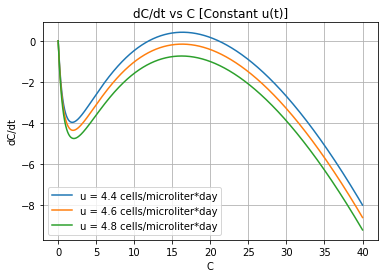

In [7]:
# Plotting up the nondimensionalized results of dC/dt with constant u values
plt.plot(c,dCdtU1, label = 'u = 4.4 cells/microliter*day')
plt.plot(c,dCdtU2, label = 'u = 4.6 cells/microliter*day')
plt.plot(c,dCdtU3, label = 'u = 4.8 cells/microliter*day')
plt.xlabel('C')
plt.ylabel('dC/dt')
plt.title('dC/dt vs C [Constant u(t)]')
plt.grid()
plt.legend(loc='lower left')

/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


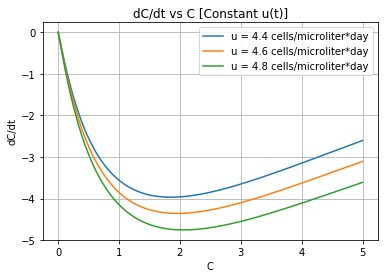

In [8]:
# plotting on a smaller interval to see the steady state at 0
c = np.linspace(0,5,10000)
dCdtU1_=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u1*zeta1+u1*zeta2+c*(u1+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))
dCdtU2_=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u2*zeta1+u2*zeta2+c*(u2+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))
dCdtU3_=-c*(zeta8-zeta6*np.log(zeta7)+zeta6*np.log(c)+(((c+zeta2)*(c*u3*zeta1+u3*zeta2+c*(u3+zeta3)))/((c+zeta2+zeta1*c)*((c+zeta2)*(c+zeta5)-zeta4))))
plt.plot(c,dCdtU1_, label = 'u = 4.4 cells/microliter*day')
plt.plot(c,dCdtU2_, label = 'u = 4.6 cells/microliter*day')
plt.plot(c,dCdtU3_, label = 'u = 4.8 cells/microliter*day')
plt.xlabel('C')
plt.ylabel('dC/dt')
plt.title('dC/dt vs C [Constant u(t)]')
plt.grid()
plt.legend(loc='upper right')

The two most recent plots show that a constant value of u(t) is capable of accomplishing both of  the criteria for an effective treatment that were set.  It is seen in the first plot that at values of u(t) > ~4.6, the cancerous steady state can be destabilized.  The plot immediately above this comment is a zoomed in portion of the previous plot, highlighting the transition of the healthy state to a stable state via the use of a constant value of u(t).

Now, the equilibrium analysis will be extended to the effector and naive T cell populations.  The goal of this analysis is to ensure that these two populations are maintained within an acceptable range, namely that they both remain as positive values.

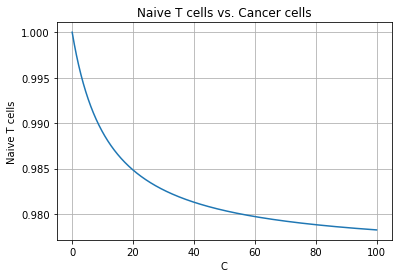

In [9]:
# Plotting up the values of the naive T cells (u(t)=constant)
# It is important to note that this population is unaffected by u(t).
c = np.linspace(0.000001,100,100000)
Tn = (c+zeta2)/(c+c*zeta1+zeta2)
plt.plot(c,Tn)
plt.xlabel('C')
plt.ylabel('Naive T cells')
plt.title('Naive T cells vs. Cancer cells')
plt.grid()

In [10]:
# Calculating populations of effector T cells (u(t)=constant)
c = np.linspace(0.000001,60,100000)
Te1 = ((c+zeta2)*(c*u1*zeta1+u1*zeta2+c*u1+c*zeta3))/((c+c*zeta1+zeta2)*(zeta2*c+zeta2*zeta5+c*c-c*zeta4+c*zeta5))
Te2 = ((c+zeta2)*(c*u2*zeta1+u2*zeta2+c*u2+c*zeta3))/((c+c*zeta1+zeta2)*(zeta2*c+zeta2*zeta5+c*c-c*zeta4+c*zeta5))
Te3 = ((c+zeta2)*(c*u3*zeta1+u3*zeta2+c*u3+c*zeta3))/((c+c*zeta1+zeta2)*(zeta2*c+zeta2*zeta5+c*c-c*zeta4+c*zeta5))

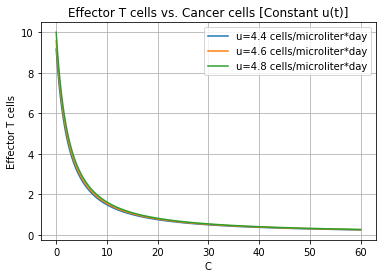

In [11]:
# Plotting up the effector T cell populations (u(t)=constant)
plt.plot(c,Te1, label = 'u=4.4 cells/microliter*day')
plt.plot(c,Te2, label = 'u=4.6 cells/microliter*day')
plt.plot(c,Te3, label = 'u=4.8 cells/microliter*day')
plt.xlabel('C')
plt.ylabel('Effector T cells')
plt.title('Effector T cells vs. Cancer cells [Constant u(t)]')
plt.grid()
plt.legend()

Since both the Tn and Te populations remain positive for all values given for C, these scenarios are plausible.

In order to allow for better comparison of the three populations over time, the previous three plots were consolidated into three subplots below.

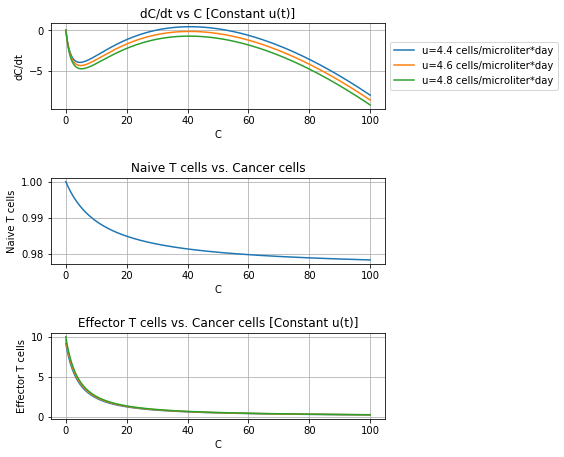

In [12]:
# Subplots of each cell type population - for comparison
# These are all nondimensionalized graphs

# Cancer cell population
plt.subplot(3,1,1)
c = np.linspace(0.000001,100,100000)
plt.plot(c,dCdtU1, label = 'u=4.4 cells/microliter*day')
plt.plot(c,dCdtU2, label = 'u=4.6 cells/microliter*day')
plt.plot(c,dCdtU3, label = 'u=4.8 cells/microliter*day')
plt.xlabel('C')
plt.ylabel('dC/dt')
plt.title('dC/dt vs C [Constant u(t)]')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Naive T cell population
plt.subplot(3,1,2)
Tn = (c+zeta2)/(c+c*zeta1+zeta2)
plt.plot(c,Tn)
plt.xlabel('C')
plt.ylabel('Naive T cells')
plt.title('Naive T cells vs. Cancer cells')
plt.grid()

# Effector T cell population
plt.subplot(3,1,3)
plt.plot(c,Te1, label = 'u=4.4 cells/microliter*day')
plt.plot(c,Te2, label = 'u=4.6 cells/microliter*day')
plt.plot(c,Te3, label = 'u=4.8 cells/microliter*day')
plt.xlabel('C')
plt.ylabel('Effector T cells')
plt.title('Effector T cells vs. Cancer cells [Constant u(t)]')
plt.grid()

plt.subplots_adjust(hspace=.8, top=1.5)

### Integrated Solution

The next goal is to integrate the system of differential equations in order to find the sizes of the three populations with respect to time.  This integration will be performed numerically.

In [13]:
# Integrating the system of three differential equations to see their interactions for a constant u(t)
# Integrating the differential equations with respect to time

# defining our constant u(t) value
def u(t):
    return 4.6 # cells/microliter*day

# defining the system of differential equations - nondimensionalized
def deriv(X,t):
    Tn,Te,C = X
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

# Initial conditions - nondimensionalized
Tn0 = 1510*(dn/sn)
Te0 = 20*(gamma_c/dn)
# The paper gave 10,000 as the initial condition for cancer; we chose 400 since the steady state is ~376
C0 = 400*(gamma_e/dn)


IC = [Tn0, Te0, C0]

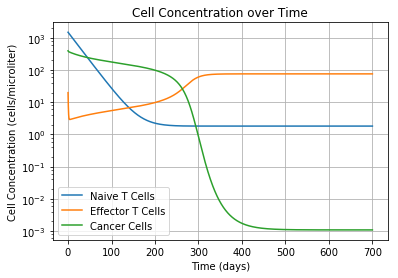

In [14]:
t = np.linspace(0,700*dn,1000)    # dimensionless time

X = odeint(deriv, IC, t)
Tn=X[:,0]
Te=X[:,1]
C=X[:,2]


# visualization
# time is re-dimensionalized here, as is C, Te, and Tn
t_dim = t/dn               # days
Tn_dim = Tn/(dn/sn)        # cells/microliter
Te_dim = Te/(gamma_c/dn)   # cells/microliter
C_dim = C/(gamma_e/dn)     # cells/microliter
plt.semilogy(t_dim,Tn_dim,label = 'Naive T Cells')
plt.semilogy(t_dim,Te_dim,label = 'Effector T Cells')
plt.semilogy(t_dim,C_dim,label = 'Cancer Cells')

plt.legend(loc='lower left')
plt.xlabel('Time (days)')
plt.ylabel('Cell Concentration (cells/microliter)')
plt.title('Cell Concentration over Time')
plt.grid()

The above graph shows the cancer cell population approaching 0 at steady state; however, it never reaches zero because this model is not accurate on the order of ~1 cell/microliter (stated in the paper) due to the natural log in the Gompertz growth term of the cancer cell population.  Due to this numerical limitation of the model, we claim that the cancer is "cured" when the cancer cell population approaches $10^{-2}$ cell/microlitrer.  At this position, the cancer population is small enough relative to the effector T cell population that is can be treated as effectively 0.  According to the plot, this treatment would need to last ~ 350 days, about a year, if u(t) is to remain a constant 4.6 cells/(microliter*day).

Below, more values of u(t) will be explored in order to determine if a critical value of u(t) can be found.

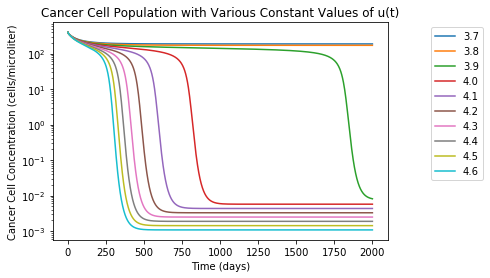

In [15]:
# Plotting up cancer cell populations with several different u(t) values
t = np.linspace(0,2000*dn,1000)
t_dim = t/dn
def deriv(X,t):
    Tn,Te,C = X
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

# defining a list of constant u values (including our value of 4.6 used previously)
uList = np.linspace(3.7,4.6,10)
for u in uList:
    X = odeint(deriv, IC, t)
    C = X[:,2]
    C_dim = C/(gamma_e/dn) 
    plt.semilogy(t_dim,C_dim)
plt.legend(uList,bbox_to_anchor=(1.3, 1))
plt.title('Cancer Cell Population with Various Constant Values of u(t)')
plt.xlabel('Time (days)')
plt.ylabel('Cancer Cell Concentration (cells/microliter)')

There seems to be a critical value of u(t) between 3.8 and 3.9 cell/(microliter*day).  The range of u(t) values will now be cut down to examine the behavior further.

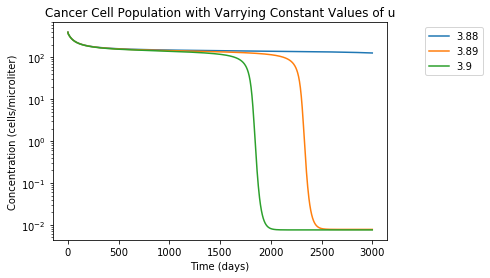

In [16]:
# Plotting up on an even smaller range to find the critical u value
# Plotting up cancer cell populations with several different u values
t = np.linspace(0,3000*dn,1000)
t_dim = t/dn
uList = np.linspace(3.88,3.9,3)
for u in uList:
    X = odeint(deriv, IC, t)
    C = X[:,2]
    C_dim = C/(gamma_e/dn) 
    plt.semilogy(t_dim,C_dim)
plt.legend(uList,bbox_to_anchor=(1.3, 1))
plt.title('Cancer Cell Population with Varrying Constant Values of u')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (cells/microliter)')

Based on the graph above, the critical value for a constant u(t) value is about 3.89 cells/microliter per day. This represents the minimum constant infusion of T cells necessary to kill the cancer. However, the treatment period is incredibly long, over 6 years.

There is a discrepancy between the above analysis of a critical u(t) value and the first analysis done via dC/dt. We believe this discrepency arises from the inaccuracy present in the model on the order of 1 cell/microliter. It can be seen above that, while these lower u(t) values, less than 4, are causing significant drops in the cancer population, the terminal values are slightly higher than that of the 4.6 cells/microliter*day value estimated before. Some new steady state, perhaps a metastable one, may be being reached in these cases. Therefore, an exact determination of a critical value of a constant u is not possible in this case due to the numerical inaccuracies of the system in this domain.

### Daily Dosing Regimen - non-constant u(t)

In order to explore non-constant dosing strategies, this section creates a step function for u(t) to infuse a certain dose of effector T cells over a speicified dosing time. The time between each dose is also able to be altered.

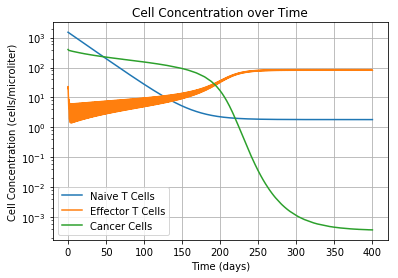

In [17]:
# Implementing a dosing function, instead of a constant infusion of effector T cells
# parameter values
td = (1/24)    # administration time, days
tdose = 1      # time between doses, days
Udose = 5      # cells/microliter

t = np.linspace(0,400*dn,100000)

# defining a u(t) dosing regimen
def u(t):
    if (t/dn) % tdose <= td:
        return Udose/td
    else:
        return 0

# defining the same system as before, but now with our step funciton for u(t)
def deriv(X,t):
    Tn,Te,C = X
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

# same integration, but new system containing step funciton for u(t)
X = odeint(deriv, IC, t, tcrit=t)
Tn=X[:,0]
Te=X[:,1]
C=X[:,2]

# re-dimensionalizing the values
Tn_dim = Tn/(dn/sn)        # cells/microliter
Te_dim = Te/(gamma_c/dn)   # cells/microliter
C_dim = C/(gamma_e/dn)     # cells/microliter

# plotting it up
plt.semilogy(t/dn,Tn_dim,label = 'Naive T Cells')
plt.semilogy(t/dn,Te_dim,label = 'Effector T Cells')
plt.semilogy(t/dn,C_dim,label = 'Cancer Cells')
plt.legend(loc='lower left')
plt.xlabel('Time (days)')
plt.ylabel('Cell Concentration (cells/microliter)')
plt.title('Cell Concentration over Time')
plt.grid()

This plot is analogous to our integrated solution from earlier; however, the effector T cell population is now subject to a step function addition each day for one hour.  The solid portion of the graph is merely due to the compression of the steps over the scale of the x-axis.

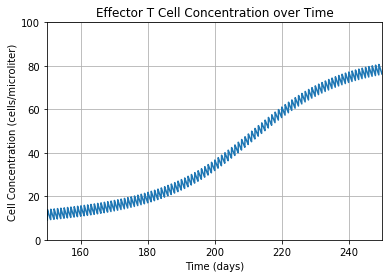

In [18]:
# Plotting up Te population on a shorter range to illustate dosing effects')
plt.plot(t/dn,Te_dim)
plt.axis([150,250,0,100])
plt.xlabel('Time (days)')
plt.ylabel('Cell Concentration (cells/microliter)')
plt.title('Effector T Cell Concentration over Time')
plt.grid()

The following plot illustrates the dosing schedule - the patient gets a 1 hour dose every 24 hours.

[0, 10, 0, 130]

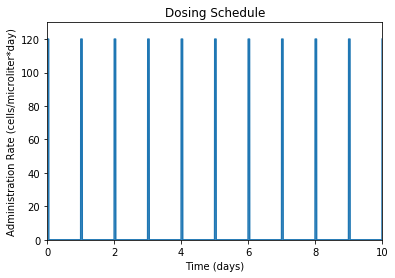

In [19]:
# Dosing schedule - shown over a 10 day period to be seen clearly
y = [u(t) for t in t]
plt.plot(t/dn,y)
plt.title('Dosing Schedule')
plt.xlabel('Time (days)')
plt.ylabel('Administration Rate (cells/microliter*day)')
plt.axis([0,10,0,130])

* This dose represents a rate of Te cell infussion of 5 cells/microliter*day over a 1 hour period. This results in 120 cells/microliter being added per hour.
* This step funciton model for a daily dose is more realisitic because the patient does not need to be hooked up to a device 24/7, rather just needs to receive treatment once a day for an hour.

### Varrying the step function for u(t)

Now, we look at several different dose sizes, over the same 1 hour period, once a day.

In [20]:
t = np.linspace(0,400*dn,100000)
t_dim = t/dn

# Defining new values of Udose
Udose1 = 3   # cells/microliter
Udose2 = 4   # cells/microliter
Udose3 = 5   # cells/microliter
Udose4 = 6   # cells/microliter

# Defining a dose regemin for each Udose
def u1(t):
    if (t/dn) % tdose <= td:
        return Udose1/td
    else:
        return 0

def u2(t):
    if (t/dn) % tdose <= td:
        return Udose2/td
    else:
        return 0

def u3(t):
    if (t/dn) % tdose <= td:
        return Udose3/td
    else:
        return 0

def u4(t):
    if (t/dn) % tdose <= td:
        return Udose4/td
    else:
        return 0

# Defining a new system of differential equations for each u(t)
def deriv1(X1,t):
    Tn,Te,C = X1
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u1(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

def deriv2(X2,t):
    Tn,Te,C = X2
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u2(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

def deriv3(X3,t):
    Tn,Te,C = X3
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u3(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

def deriv4(X4,t):
    Tn,Te,C = X4
    dTn = 1-Tn-zeta1*Tn*(C/(C+zeta2))
    dTe = zeta3*Tn*(C/(C+zeta2))+zeta4*Te*(C/(C+zeta2))-zeta5*Te-C*Te+u4(t)*gamma_c/dn**2
    dC = zeta6*C*(np.log(zeta7)-np.log(C))-zeta8*C-C*Te
    return [dTn,dTe,dC]

# Solving each system and storing the solutions
X1 = odeint(deriv1, IC, t, tcrit=t)
C1=X1[:,2]

X2 = odeint(deriv2, IC, t, tcrit=t)
C2=X2[:,2]

X3 = odeint(deriv3, IC, t, tcrit=t)
C3=X3[:,2]

X4 = odeint(deriv4, IC, t, tcrit=t)
C4=X4[:,2]

# Re-dimensionalizing the cell populations
C_dim1 = C1/(gamma_e/dn)     # cells/microliter
C_dim2 = C2/(gamma_e/dn)     # cells/microliter
C_dim3 = C3/(gamma_e/dn)     # cells/microliter
C_dim4 = C4/(gamma_e/dn)     # cells/microliter

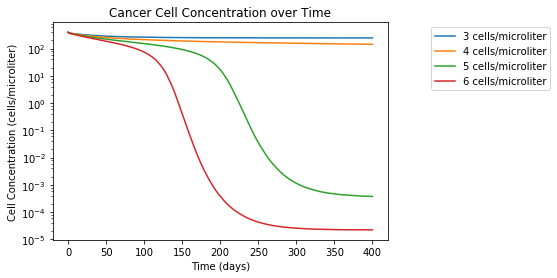

In [21]:
# Plotting up the respective cancer cell populations
plt.semilogy(t/dn,C_dim1,label = '3 cells/microliter')
plt.semilogy(t/dn,C_dim2,label = '4 cells/microliter')
plt.semilogy(t/dn,C_dim3,label = '5 cells/microliter')
plt.semilogy(t/dn,C_dim4,label = '6 cells/microliter')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.xlabel('Time (days)')
plt.ylabel('Cell Concentration (cells/microliter)')
plt.title('Cancer Cell Concentration over Time')

* The treatment time decreases significantly as Udose increases (from 5 to 6 and contiually from there).
* The cricitcal value for this type of dosing (1 hour, every 24 hours) would fall between 4 and 5 cells/microliter.

### Conclusion
The principal goal in developing a T cell treatment was to utilize the body’s natural defense systems to fight chronic myelogenous leukemia in way that minimizes the adverse symptoms associated with chemotherapy.  The main obstacle in accomplishing this sort of treatment is perfecting the extraction and cultured growth of effector T cell populations outside of the patient, which is not dealt with in this project.  The value of this project is that it clearly demonstrates how this therapy can be used in a dosing regime to effectively treat chronic myelogenous leukemia, should the technology become available.  

The project began by exploring the steady state behavior of the three-population system without use of the therapy.  Subsequently, utilizing a constant infusion rate displayed a marked change in the behavior of the system and uncovered the possibility of effective treatment due to the altered stability of the two steady-states, dismantling the cancerous state and stabilizing the healthy one.  Finally, the infusion was shown to be effective as a dosing regime when it was shown that the cancer could be treated via a daily, one-hour infusions, the length of the treatment being of a reasonable length for therapeutic T cell doses of 5 cells/microliter or greater.  This treatment seems to be an effective alternative to chemotherapy in treating chronic myelogenous leukemia and would display fewer of the harsh side-effects common to the treatment.